# Сверточные нейронные сети. Аугментация данных. Библиотека timm

Мы обсудили различные архитектуры нейронных сетей. Теперь попробуем поговорить о том, как можно улучшить процедуру обучения путем аугментации данных.

### Что такое аугментация данных?

Картинки состоят из пикселей и содержат визуальную информацию. Пусть у нас есть картинка с характерным объектом на ней (например, попугаем).

Сможем ли мы распознать попугая на ней, сделав некоторые изменения пикселей?

![alt text](https://camo.githubusercontent.com/0a0cea2503f569ac965d9de888206b482d13ffe751c682638c730296a352e1ba/68747470733a2f2f686162726173746f726167652e6f72672f776562742f62642f6e652f72762f62646e6572763563746b75646d73617a6e687734637273646669772e6a706567)

Подобные изменения картинки, сохраняющие при этом содержание изображения, называются аугментацией данных. Такая техника позволяет `схитрить`: фактически одна картинка под действием разных преобразований для нейросети становится большим количеством разных картинок.

При этом мы не тратим ресурсы на разметку: на всех аугментированных картинках по-прежнему изображен попугай, и нам не требуется переразмечать это изображение.

Для внедрения аугментаций подойдет библиотека [albumentations](https://albumentations.ai/)

In [9]:
import albumentations
from albumentations.pytorch import ToTensorV2

train_transform = albumentations.Compose(
    [
        albumentations.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        #albumentations.RandomCrop(height=128, width=128),
        albumentations.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        albumentations.RandomBrightnessContrast(p=0.5),
        #albumentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        #ToTensorV2(),
    ]
)

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('test_image.png')[:,:,::-1]
image_aug = []
for i in range(10):
    image_aug.append(train_transform(image=image)['image'])

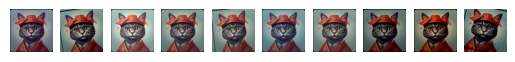

In [15]:
fig, ax = plt.subplots(1,10)
for i in range(10):
    ax[i].imshow(image_aug[i])
    ax[i].axis('off')

Важно учесть, что аугментация **не используется** для валидационного (тестового) датасета!

In [16]:
val_transform = albumentations.Compose(
    [
        albumentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

## Библиотека timm

Мы говорили на лекции о различных архитектурах сверточных нейронных сетей для задачи компьютерного зрения.

На сегодняшний момент часто нам нет необходимости писать код для известных нейросетей с нуля - они давно интегрированы в разные библиотеки. Сегодня мы поговорим о библиотеке [timm](https://timm.fast.ai/).

Библиотека `timm` активно развивается, и в нее интегрируются все современные и популярные нейросети для работы с изображениями (по мере их публикации). Также, библиотека `timm` самостоятельно умеет подгружать веса для предобученных моделей (если таковые имеются в открытом публичном доступе).

## Установка `timm`

Устанавливается библиотека просто: `pip install timm`

Примеры

In [18]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [19]:
import timm


In [20]:
# Example 1:
# List all architectures which names contains 'resnet'.
timm.list_models("*resnet*")

['cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'eca_resnet33ts',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet200d',
 'ecaresnet269d',
 'ecaresnetlight',
 'gcresnet33ts',
 'gcresnet50t',
 'inception_resnet_v2',
 'lambda_resnet26rpt_256',
 'lambda_resnet26t',
 'lambda_resnet50ts',
 'legacy_seresnet18',
 'legacy_seresnet34',
 'legacy_seresnet50',
 'legacy_seresnet101',
 'legacy_seresnet152',
 'nf_ecaresnet26',
 'nf_ecaresnet50',
 'nf_ecaresnet101',
 'nf_resnet26',
 'nf_resnet50',
 'nf_resnet101',
 'nf_seresnet26',
 'nf_seresnet50',
 'nf_seresnet101',
 'resnet10t',
 'resnet14t',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet32ts',
 'resnet33ts',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50_clip',
 'resnet50_clip_gap',
 'resnet50_gn',
 'resnet50_mlp',
 'resnet50c',
 'resnet50d',
 'resnet50s',
 'resnet50t',
 'resnet50x4_clip',
 'resnet50x4_clip_gap',
 'resnet50x16_clip

In [22]:
# Example 2:
# List all models which have pretrained weights.
timm.list_models(pretrained=True)[:5]

['bat_resnext26ts.ch_in1k',
 'beit_base_patch16_224.in22k_ft_in22k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k']

In [23]:

model = timm.create_model(
  # название архитектуры
  model_name="resnet34.a1_in1k",

  # использовать ли веса предобученной модели
  pretrained=True,

  # использовать ли только те функции, которые можно экспортировать
  # в универсальный формат весов нейросетей (важно для кроссплатформенной поддержки)
  exportable=True,

  # желаемое количество классов (в случае регрессии - 1 класс)
  num_classes=10,

  # количество входных каналов у картинки (у цветных - 3, у ч/б - 1)
  in_chans=3,

  # Тип пулинга в конце сверточной части.
  # Опции:
  # "avg" - global average pooling;
  # "max" - global max pooling;
  # "avgmax" - mean of global average pooling and global max pooling;
  # "catavgmax" - concatenated average pooling and max pooling.
  global_pool="avg",

  # вероятность дроп-аута (у некоторых моделей, только в полносвязных слоях)
  drop_rate=0.1
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

In [25]:
model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

### Кастомизация модели из библиотеки `timm`

In [26]:
import timm
import torch


class NNModel(torch.nn.Module):
  """Implements custom ResNet18 model."""

  def __init__(
          self,
          model_name: str,
          pretrained: bool,
          exportable: bool,
          num_classes: int,
          global_pool: str,
          out_features: int,
    ) -> None:
    """
    Wrapper of the timm model.
    """
    super().__init__()
    self._backbone = timm.create_model(
      model_name=model_name,
      pretrained=pretrained,
      exportable=exportable,
      num_classes=num_classes,
      global_pool=global_pool,
    )
    in_features = self._backbone.get_classifier().in_features

    # выключить встроенную классификационную часть (оставить ТОЛЬКО сверточные слои)
    self._backbone.reset_classifier(num_classes=0)

    # самостоятельно реализовать классификационную часть (она же `классификационная голова`)
    self.fc = torch.nn.Sequential(
        torch.nn.Linear(
          in_features=in_features,
          out_features=out_features,
          bias=False,
        ),
        torch.nn.BatchNorm1d(num_features=out_features),
        torch.nn.ReLU(inplace=True),
        torch.nn.Linear(
          in_features=out_features,
          out_features=num_classes,
        )
    )

  def forward(self, tensor: torch.Tensor) -> torch.Tensor:
    """
    Perform forward pass over input tensors.

    Parameters:
      tensor: Batch of images with shape (B, C, H, W).

    Returns:
      Raw logits with shape (B, config.num_classes).
    """
    return self.fc(self._backbone(tensor))

Модели из библиотеки `timm` также имеют интерфейс для извлечения промежуточных выходов слоев нейросети:

```
model = timm.create_model(
  "resnet18",
  pretrained=True,
  
  # необходимо включить этот параметр, теперь модель при вызове
  # вернет все промежуточные выходы слоев
  features_only=True
)
```

# Обучение

In [27]:
! wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2024-08-22 15:45:16--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2024-08-22 15:45:16--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  21.3MB/s    in 3m 59s  

2024-08-22 15:49:16 (20.0 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [28]:
! tar -xzf food-101.tar.gz

In [29]:
import os

print(len(os.listdir('food-101/images')))
print(os.listdir('food-101/images'))

101
['filet_mignon', 'ramen', 'spring_rolls', 'macarons', 'sushi', 'mussels', 'fried_calamari', 'french_toast', 'french_onion_soup', 'red_velvet_cake', 'cannoli', 'foie_gras', 'carrot_cake', 'creme_brulee', 'panna_cotta', 'club_sandwich', 'scallops', 'lobster_roll_sandwich', 'dumplings', 'eggs_benedict', 'chocolate_mousse', 'chicken_curry', 'cheesecake', 'peking_duck', 'tuna_tartare', 'clam_chowder', 'beet_salad', 'omelette', 'sashimi', 'falafel', 'croque_madame', 'gnocchi', 'caprese_salad', 'apple_pie', 'edamame', 'churros', 'risotto', 'poutine', 'grilled_cheese_sandwich', 'crab_cakes', 'beignets', 'prime_rib', 'escargots', 'spaghetti_bolognese', 'chocolate_cake', 'tiramisu', 'beef_tartare', 'pad_thai', 'baklava', 'caesar_salad', 'lasagna', 'waffles', 'baby_back_ribs', 'bibimbap', 'pho', 'gyoza', 'garlic_bread', 'pulled_pork_sandwich', 'seaweed_salad', 'ravioli', 'tacos', 'bruschetta', 'spaghetti_carbonara', 'beef_carpaccio', 'fish_and_chips', 'bread_pudding', 'paella', 'steak', 'nach

## Создание датасета с использованием аугментаций

In [30]:
food_classes = sorted(os.listdir('food-101/images'))

In [34]:
[os.path.join('food-101/images/apple_pie', file) for file in os.listdir('food-101/images/apple_pie')[:5]]

['food-101/images/apple_pie/2490410.jpg',
 'food-101/images/apple_pie/116705.jpg',
 'food-101/images/apple_pie/2586267.jpg',
 'food-101/images/apple_pie/3590485.jpg',
 'food-101/images/apple_pie/2648160.jpg']

In [43]:
img = cv2.imread('food-101/images/apple_pie/2490410.jpg')
img.shape

(384, 512, 3)

In [37]:
food_classes[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

In [41]:
[food_classes.index('baklava')]*10

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [42]:
class DatasetCustom(torch.utils.data.Dataset):
    def __init__(
            self,
            root: str,
            image_size: int,
            ordered_classes: list[str],
            transforms: albumentations.Compose | None,
            test_split: float = 0.9,
            type: str = 'train',
    ):
        self.files = []
        self.labels = []
        self.transforms = transforms
        self.image_size = image_size

        for folder in os.listdir(root):
            food_class_images = sorted(os.listdir(os.path.join(root, folder)))
            images_length = len(food_class_images)
            test_idx = int(images_length*test_split)
            if type == "train":
                food_class_images = food_class_images[:test_idx]
            else:
                food_class_images = food_class_images[test_idx:]
            food_class_images = [
                os.path.join(root, folder, file_) for file_ in food_class_images
            ]
            self.files.extend(food_class_images)
            self.labels.extend([ordered_classes.index(folder)]*len(food_class_images))

        if len(self.labels) != len(self.files):
            raise ValueError("Length of files isn't equal to length of labels!")

    def __getitem__(self, idx):
        image = cv2.imread(self.files[idx])[:, :, ::-1]
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = cv2.resize(image, (self.image_size, self.image_size), interpolation=cv2.INTER_AREA)

        if self.transforms is not None:
            image = self.transforms(image=image)["image"]
        label = self.labels[idx]

        return image, torch.tensor(label)

    def __len__(self):
        return len(self.files)


In [44]:
train_transform = albumentations.Compose(
    [
        albumentations.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        albumentations.RandomCrop(height=256, width=256),
        albumentations.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        albumentations.RandomBrightnessContrast(p=0.5),
        albumentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

val_transform = albumentations.Compose(
    [
        albumentations.CenterCrop(height=256, width=256),
        albumentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

In [45]:
train_dataset = DatasetCustom('food-101/images', 256, food_classes, train_transform)

In [47]:
val_dataset = DatasetCustom('food-101/images', 256, food_classes, val_transform, type="val")

In [48]:
len(train_dataset), len(val_dataset)

(90900, 10100)

In [63]:
food_classes[56]

'huevos_rancheros'

In [62]:
train_dataset[80000][1]

tensor(56)

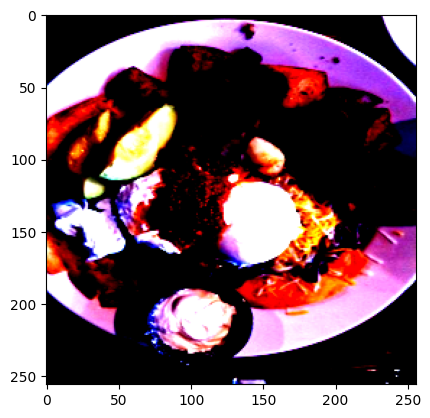

In [61]:
plt.imshow(train_dataset[80000][0].numpy().transpose(1,2,0))

## Создание модели с помощью `timm`

In [66]:
timm.list_models('*resnet34*', pretrained=True)

['legacy_seresnet34.in1k',
 'resnet34.a1_in1k',
 'resnet34.a2_in1k',
 'resnet34.a3_in1k',
 'resnet34.bt_in1k',
 'resnet34.gluon_in1k',
 'resnet34.tv_in1k',
 'resnet34d.ra2_in1k',
 'skresnet34.ra_in1k']

In [67]:
len(food_classes)

101

In [69]:
model = NNModel(
    model_name='resnet34d.ra2_in1k',
    pretrained=True,
    exportable=True,
    num_classes=101,
    global_pool="avg",
    out_features=256,
)

model.safetensors:   0%|          | 0.00/87.4M [00:00<?, ?B/s]

In [70]:
model(torch.randn(8, 3, 256, 256)).shape # expect (8, 101)

torch.Size([8, 101])

## Создание вспомогательных объектов

In [71]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    pin_memory=True,
    num_workers=2,
)

# disable shuffling
test_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    pin_memory=True,
    num_workers=2
)

In [72]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.CrossEntropyLoss()

In [74]:
N_EPOCH = 3

_=model.cuda()

In [84]:
for epoch in range(N_EPOCH):
    model.train()
    for iter, (x, y) in enumerate(train_loader):
        x = x.cuda(non_blocking=True)
        y = y.long().cuda(non_blocking=True)

        optimizer.zero_grad(set_to_none=True)
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        if iter % 20 == 0:
            print(f"Epoch: {epoch+1}/{N_EPOCH}, Iter: {iter+1}/{len(train_loader)}, Loss: {loss:1.4}")


Epoch: 1/3, Iter: 1/2841, Loss: 4.03
Epoch: 1/3, Iter: 21/2841, Loss: 3.712
Epoch: 1/3, Iter: 41/2841, Loss: 3.444
Epoch: 1/3, Iter: 61/2841, Loss: 2.906
Epoch: 1/3, Iter: 81/2841, Loss: 3.29
Epoch: 1/3, Iter: 101/2841, Loss: 3.304
Epoch: 1/3, Iter: 121/2841, Loss: 2.948
Epoch: 1/3, Iter: 141/2841, Loss: 3.315
Epoch: 1/3, Iter: 161/2841, Loss: 2.48
Epoch: 1/3, Iter: 181/2841, Loss: 3.093
Epoch: 1/3, Iter: 201/2841, Loss: 2.711
Epoch: 1/3, Iter: 221/2841, Loss: 2.69
Epoch: 1/3, Iter: 241/2841, Loss: 2.723
Epoch: 1/3, Iter: 261/2841, Loss: 2.504
Epoch: 1/3, Iter: 281/2841, Loss: 2.755
Epoch: 1/3, Iter: 301/2841, Loss: 2.254
Epoch: 1/3, Iter: 321/2841, Loss: 2.107
Epoch: 1/3, Iter: 341/2841, Loss: 2.446
Epoch: 1/3, Iter: 361/2841, Loss: 2.972
Epoch: 1/3, Iter: 381/2841, Loss: 2.181
Epoch: 1/3, Iter: 401/2841, Loss: 2.909
Epoch: 1/3, Iter: 421/2841, Loss: 2.243
Epoch: 1/3, Iter: 441/2841, Loss: 2.392
Epoch: 1/3, Iter: 461/2841, Loss: 2.587
Epoch: 1/3, Iter: 481/2841, Loss: 2.315
Epoch: 1/3

KeyboardInterrupt: 

In [80]:
y.dtype

torch.int64

In [86]:
y_preds = []
y_trues = []

model.eval()
for iter, (x, y) in enumerate(test_loader):
    with torch.no_grad():
        x = x.cuda(non_blocking=True)
        y_trues.extend(y.tolist())
        y = y.long().cuda(non_blocking=True)
        y_pred = model(x).argmax(1).tolist()
        y_preds.extend(y_pred)
        print(f"Iter {iter}/{len(test_loader)}")


Iter 0/316
Iter 1/316
Iter 2/316
Iter 3/316
Iter 4/316
Iter 5/316
Iter 6/316
Iter 7/316
Iter 8/316
Iter 9/316
Iter 10/316
Iter 11/316
Iter 12/316
Iter 13/316
Iter 14/316
Iter 15/316
Iter 16/316
Iter 17/316
Iter 18/316
Iter 19/316
Iter 20/316
Iter 21/316
Iter 22/316
Iter 23/316
Iter 24/316
Iter 25/316
Iter 26/316
Iter 27/316
Iter 28/316
Iter 29/316
Iter 30/316
Iter 31/316
Iter 32/316
Iter 33/316
Iter 34/316
Iter 35/316
Iter 36/316
Iter 37/316
Iter 38/316
Iter 39/316
Iter 40/316
Iter 41/316
Iter 42/316
Iter 43/316
Iter 44/316
Iter 45/316
Iter 46/316
Iter 47/316
Iter 48/316
Iter 49/316
Iter 50/316
Iter 51/316
Iter 52/316
Iter 53/316
Iter 54/316
Iter 55/316
Iter 56/316
Iter 57/316
Iter 58/316
Iter 59/316
Iter 60/316
Iter 61/316
Iter 62/316
Iter 63/316
Iter 64/316
Iter 65/316
Iter 66/316
Iter 67/316
Iter 68/316
Iter 69/316
Iter 70/316
Iter 71/316
Iter 72/316
Iter 73/316
Iter 74/316
Iter 75/316
Iter 76/316
Iter 77/316
Iter 78/316
Iter 79/316
Iter 80/316
Iter 81/316
Iter 82/316
Iter 83/316
It

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_trues, y_preds)

0.5550495049504951